# XGBoost From First Principles

XGBoost = Gradient Boosting + tối ưu cực mạnh

Học theo kiểu: ```“Sai chỗ nào => sửa chỗ đó”```

Các đặc điểm chính của XGBoost:

- Sparsity: Chấp nhận dữ liệu thưa (sparse input) cho cả tree booster và linear booster.

- Customization: Hỗ trợ tùy chỉnh hàm mục tiêu (objective) và hàm đánh giá (evaluation). (tự định nghĩa loss hay metric)

- DMatrix: Cấu trúc dữ liệu được tối ưu hóa giúp cải thiện hiệu năng và hiệu quả.

Ensemble = gom nhiều model lại để dự đoán tốt hơn

Nguyên lý cốt lõi: Nhiều mô hình yếu + kết hợp đúng cách = mô hình mạnh

> `Tóm lại XGBoots là thuật toán ensemble học máy dùng nhiều cây quyết định, huấn luyện theo kiểu boosting (tuần tự), tối ưu bằng gradient descent, có regularization mạnh và chạy rất nhanh.`

---

### 1. Bagging


Bagging = học song song - độc lập

1. Lấy nhiều mẫu dữ liệu ngẫu nhiên (bootstrap)

2. Train nhiều decision tree độc lập

3. Kết hợp kết quả (vote / average)

Đặc điểm:

- Các cây không liên quan nhau

- Không có cây nào “sửa lỗi” cây khác

- Mỗi cây quan trọng như nhau

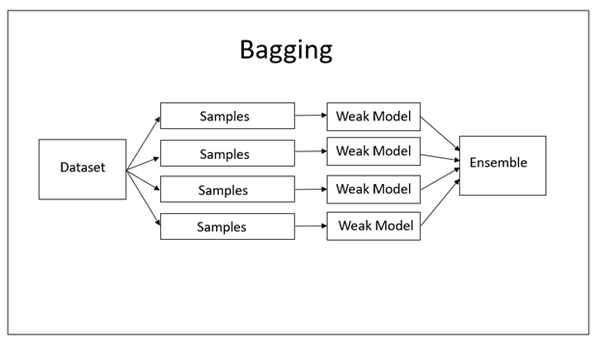

Bagging giải quyết vấn đề gì?

- Bagging giúp giảm variance

- Ít overfit hơn

### 2. Boosting

Boosting = học tuần tự - sửa lỗi dần dần

1. Train cây đầu tiên

2. Xem cây sai ở đâu

3. Cây sau tập trung học những điểm bị sai

4. Lặp lại nhiều lần

5. Gộp tất cả cây => model mạnh

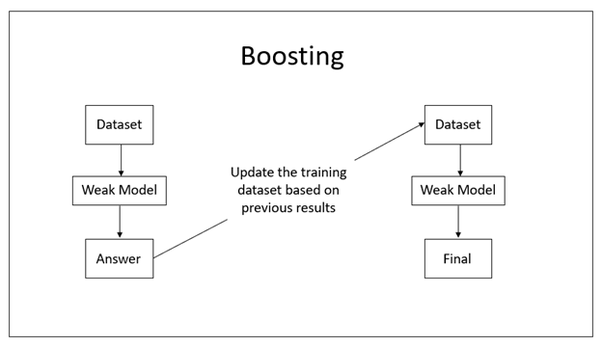

Bagging huấn luyện nhiều mô hình độc lập trên các tập dữ liệu bootstrap để giảm variance, trong khi Boosting huấn luyện mô hình theo chuỗi, mỗi mô hình sau tập trung sửa lỗi của mô hình trước nhằm giảm bias

---

### Gradient Boosting

Gradient boosting là một kỹ thuật học máy cho các bài toán hồi quy và phân loại, tạo ra mô hình dự đoán dưới dạng một tập hợp (ensemble) các mô hình yếu, thường là decision tree.

Nó xây dựng mô hình theo từng giai đoạn (stage-wise) giống như các phương pháp boosting khác, và mở rộng chúng bằng cách cho phép tối ưu một hàm loss bất kỳ có đạo hàm.

Mục tiêu của bất kỳ thuật toán học có giám sát nào là xác định một hàm loss và tối thiểu hóa nó. Điều này cũng đúng với Gradient Boosting. Ở đây, ta dùng mean squared error (MSE) làm hàm loss như sau:

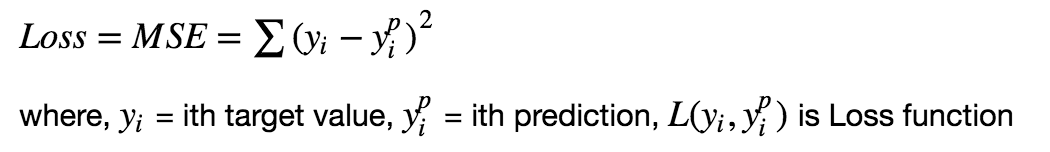

Chúng ta muốn các dự đoán sao cho giá trị loss (MSE) là nhỏ nhất.

Bằng cách sử dụng gradient descent và cập nhật các dự đoán dựa trên learning rate, ta có thể tìm được các giá trị làm cho MSE đạt cực tiểu.

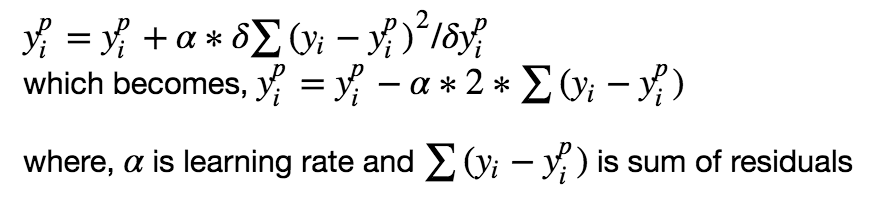

Vì vậy, về cơ bản, chúng ta đang cập nhật các dự đoán sao cho tổng phần dư (residuals) gần bằng 0 (hoặc nhỏ nhất) và các giá trị dự đoán đủ gần với giá trị thực.

Bây giờ, chúng ta huấn luyện mô hình thứ hai dựa trên gradient của lỗi đối với các dự đoán của mô hình đầu tiên. Như vậy, mô hình thứ hai sẽ sửa các lỗi của mô hình đầu tiên.

1. Model 1 đoán

2. Tính residual

3. Model 2 học residual

4. Cộng dự đoán lại

5. Lặp lại

### Gradient Boosted Trees

Gradient Boosted Trees là Gradient Boosting trong đó mô hình cơ sở là Decision Tree. Mỗi cây được xây dựng bằng cách greedily chọn split làm giảm loss nhiều nhất và mỗi lá mang một trọng số đại diện cho giá trị dự đoán.

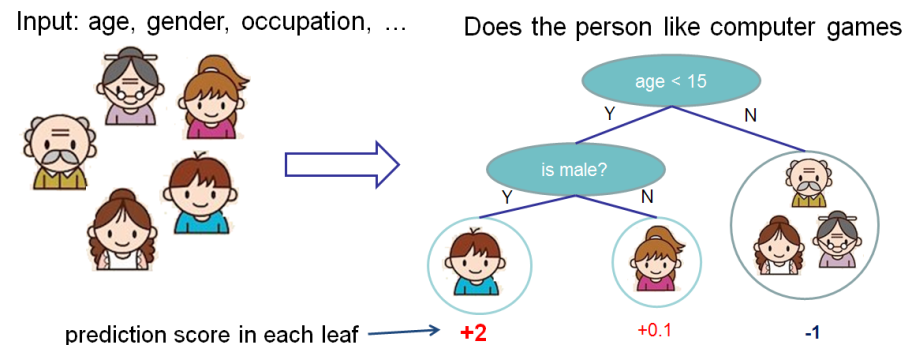

Khi xây dựng một decision tree, một thách thức là quyết định cách chia một lá hiện tại. Ví dụ, trong hình trên, làm thế nào ta có thể thêm một tầng mới cho lá (age > 15).

Một cách tiếp cận “tham lam” (greedy) là xem xét mọi cách chia có thể trên các feature còn lại (ví dụ: gender và occupation), rồi tính loss mới cho từng cách chia. Sau đó, ta chọn cây làm giảm loss nhiều nhất.

Công thức chi tiết xem qua: https://www.kaggle.com/code/prashant111/xgboost-k-fold-cv-feature-importance#3.-XGBoost-algorithm-intuition-

### Extreme Gradient Boosting (XGBoost)

XGBoost là một trong những cách triển khai nhanh nhất của gradient boosted trees. Nó đạt được điều này bằng cách giải quyết một trong những điểm kém hiệu quả lớn nhất của gradient boosted trees.

Hãy xét trường hợp có hàng nghìn feature, và do đó có hàng nghìn cách chia có thể. Nếu ta xét loss tiềm năng cho mọi cách chia để tạo một nhánh mới, thì sẽ có hàng nghìn phép tính loss.

XGBoost giải quyết sự kém hiệu quả này bằng cách xem xét phân phối của các feature trên toàn bộ dữ liệu tại một lá, và dùng thông tin đó để giảm không gian tìm kiếm các điểm chia.

Mặc dù XGBoost có triển khai một số thủ thuật regularization, nhưng tăng tốc độ này là đặc điểm hữu ích nhất của thư viện, cho phép thử nghiệm rất nhiều cấu hình hyperparameter một cách nhanh chóng.

Điều này đặc biệt hữu ích vì có rất nhiều hyperparameter được thiết kế để giảm overfitting.

---

### XGBoost in Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Wholesale customers data.csv')

#### EDA

In [ ]:
df.shape

(440, 8)

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


#### Chia dữ liệu

In [ ]:
X = df.drop('Channel', axis=1)
y = df['Channel']

In [ ]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [ ]:
y.head()

,Channel
0,2
1,2
2,2
3,1
4,2


Chuyển về 0 1 cho phù hợp với bài toán nhị phân

In [ ]:
y[y == 2] = 0
y[y == 1] = 1

In [ ]:
y.head()

,Channel
0,0
1,0
2,0
3,1
4,0


---

#### Huấn luyện

DMatrix là cấu trúc dữ liệu tối ưu của XGBoost, dùng để lưu feature và label, giúp train nhanh hơn, xử lý tốt missing value và tiết kiệm bộ nhớ. Khi dùng XGBoost native API (xgb.train), DMatrix là bắt buộc.

In [ ]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

> XGBClassifier => không dùng DMatrix

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest  = xgb.DMatrix(X_test, label=y_test)

# model = xgb.train(params, dtrain, num_boost_round=100)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from xgboost import XGBClassifier

params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

# instantiate the classifier
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

#### Đánh giá

In [ ]:
y_pred = xgb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8788


---

### k-fold Cross Validation

Đảm bảo rằng tập dữ liệu huấn luyện ban đầu được sử dụng cho cả việc huấn luyện và kiểm định. Và mỗi mẫu dữ liệu chỉ được sử dụng làm dữ liệu kiểm định đúng một lần.

XGBoost hỗ trợ k-fold cross validation thông qua phương thức cv().

Một số tham số như sau:

- nfolds: Tham số này chỉ định số tập cross-validation mà chúng ta muốn tạo.

- num_boost_round: Chỉ số lượng cây (trees) được xây dựng.

- metrics: Các chỉ số đánh giá hiệu năng được sử dụng trong quá trình cross validation.

- as_pandas:  Dùng để trả kết quả dưới dạng DataFrame của pandas.

- early_stopping_rounds:  Tham số này dừng việc huấn luyện sớm nếu metric trên tập validation không cải thiện sau một số vòng nhất định.

- seed: Tham số này dùng để đảm bảo khả năng tái lập kết quả.

In [ ]:
from xgboost import cv

params = {"objective":"binary:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}

xgb_cv = cv(
    dtrain=data_dmatrix,
    params=params,
    nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="auc",
    as_pandas=True,
    seed=123
)

In [ ]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.916130,0.017352,0.883424,0.031286
1,0.916677,0.017711,0.884176,0.031818
2,0.941731,0.010625,0.920685,0.004896
3,0.959883,0.004367,0.946312,0.011539
4,0.962856,0.003064,0.942982,0.012563


### Feature importance

XGBoost cung cấp một cách để kiểm tra mức độ quan trọng của từng đặc trưng (feature) trong tập dữ liệu gốc bên trong mô hình. Bằng cách đếm số lần mỗi feature được dùng để chia (split) trong tất cả các cây boosting của mô hình.

> Feature nào được dùng để chia nhánh nhiều lần hơn => feature đó quan trọng hơn

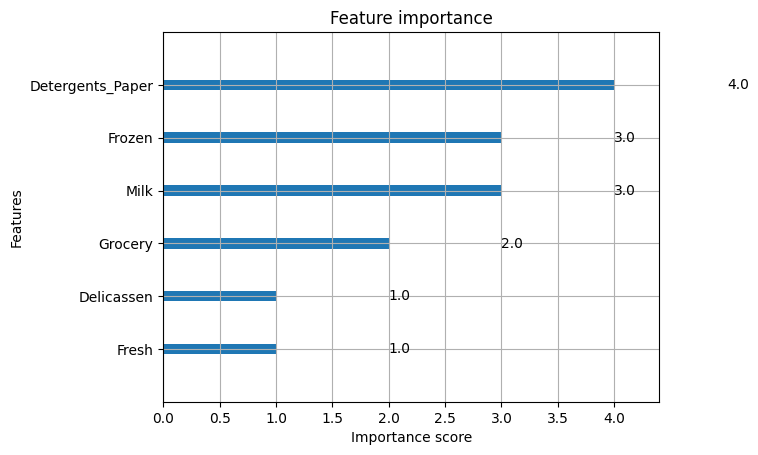

<Figure size 1600x1200 with 0 Axes>

In [ ]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

---

### Kết luận

Bài toán phân loại khách hàng từ hai kênh khác nhau là khách hàng Horeca (Khách sạn/Bán lẻ/Café) hoặc khách hàng thuộc kênh bán lẻ (Retail) (dạng danh nghĩa).

Các nhãn y chứa các giá trị là 1 và 2 và đã chuyển đổi chúng thành 0 và 1 để phục vụ cho việc phân tích tiếp theo.

Huấn luyện bộ phân loại XGBoost và thu được điểm độ chính xác là 91.67%.

Thực hiện k-fold cross-validation với XGBoost.

Xác định được đặc trưng quan trọng nhất trong XGBoost bằng cách sử dụng hàm plot_importance() trong XGBoost.


---